In [11]:
import numpy as np
import pandas as pd
import yfinance as yf
import riskfolio as rp
import matplotlib.pyplot as plt


In [12]:
tickers = ["PFE", "JNJ", "GOOGL", 
           "AAPL", "COST", "WMT", "KR", "JPM", 
          "BAC", "HSBC"]
tickers.sort()
data = yf.download(tickers, start ='2016-01-01', end ='2019-12-30')
data = data.loc[:,('Adj Close', slice(None))]
data.columns = tickers
assets = data.pct_change().dropna()


[*********************100%***********************]  10 of 10 completed


In [13]:
Y = assets
port = rp.Portfolio(returns=Y)
pd.options.display.float_format = '{:.4%}'.format

In [14]:
rm = 'MSV' 
method_mu='hist'
method_cov='hist'
port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)
w1 = port.optimization(model='Classic', rm=rm, obj='Sharpe', rf=0.0, l=0, hist=True)
ws = port.efficient_frontier(model='Classic', rm=rm, points=20, rf=0, hist=True)
w2 = port.rp_optimization(model='Classic', rm=rm, rf=0, b=None, hist=True)

y


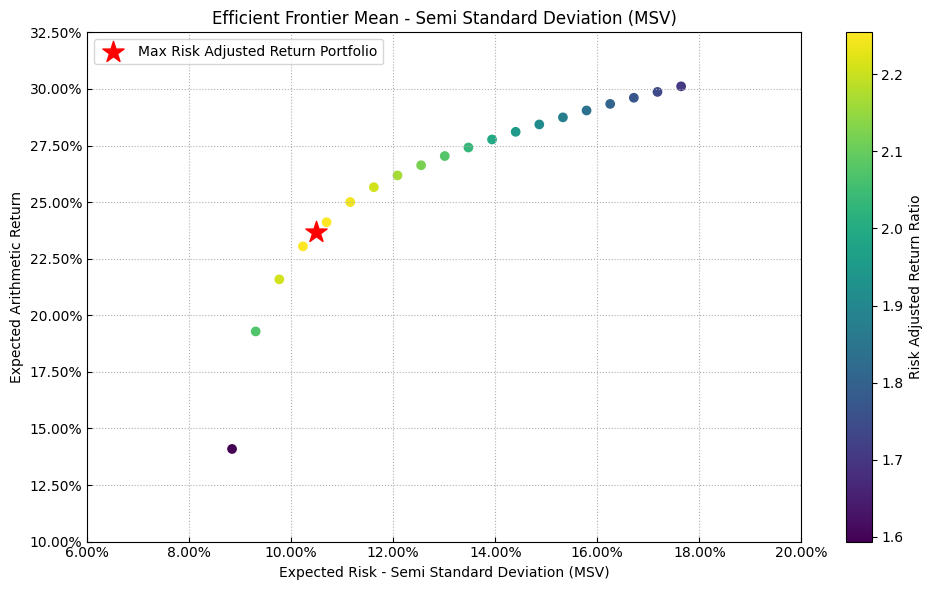

In [15]:
label = 'Max Risk Adjusted Return Portfolio'
ax = rp.plot_frontier(w_frontier=ws, mu=port.mu, cov=port.cov, returns=port.returns,
                       rm=rm, rf=0, alpha=0.05, cmap='viridis', w=w1,
                       label=label, marker='*', s=16, c='r',
                       height=6, width=10, t_factor=252, ax=None)
print('y')

In [17]:
rp.show()

AttributeError: module 'riskfolio' has no attribute 'show'

/home/cloud/.local/lib/python3.10/site-packages/riskfolio/PlotFunctions.py:569: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


<AxesSubplot: title={'center': 'Portfolio'}>

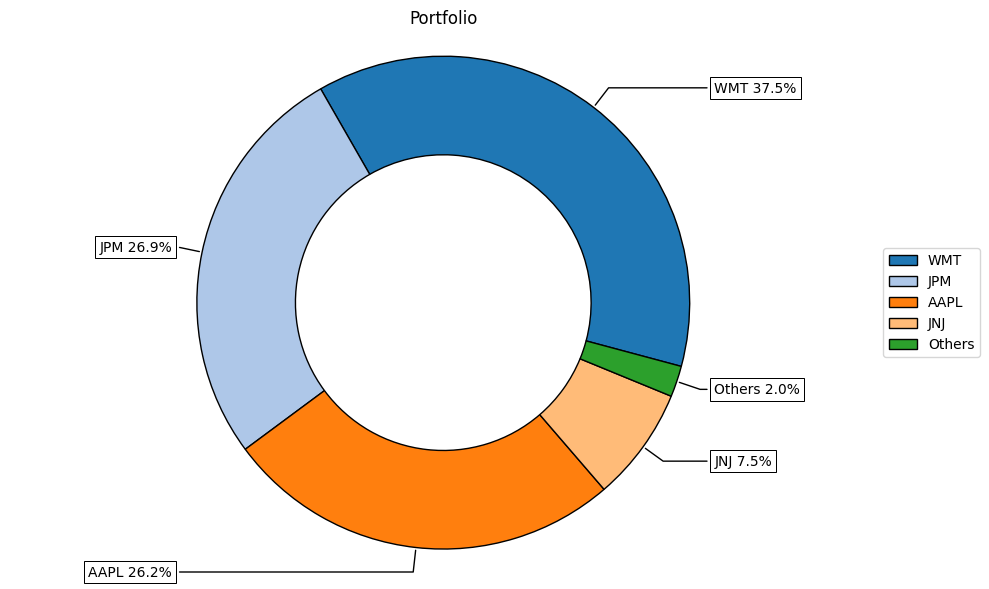

In [ ]:
rp.plot_pie(w=w1, title='Portfolio', height=6, width=10,
                 cmap="tab20", ax=None)